In [2]:
import pandas as pd
import numpy as np

In [3]:
vaccinations_df = pd.read_csv('dataset_final.csv')

In [4]:
vaccinations_df

,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred
0,2020-12-27,AUT,739.0,739.0,NaN,NaN,NaN,0.01,NaN,NaN
1,2020-12-28,AUT,2053.0,2053.0,NaN,1314.0,1314.0,0.02,146.0,NaN
2,2020-12-29,AUT,3681.0,3681.0,NaN,1628.0,1471.0,0.04,163.0,NaN
3,2020-12-30,AUT,5044.0,5044.0,NaN,1363.0,1435.0,0.06,159.0,NaN
4,2020-12-31,AUT,5054.0,5054.0,NaN,10.0,1079.0,0.06,120.0,NaN
...,...,...,...,...,...,...,...,...,...,...
5712,2021-07-02,SWE,8168667.0,4999452.0,3169215.0,NaN,119890.0,80.88,11871.0,31.38
5713,2021-07-03,SWE,NaN,NaN,NaN,NaN,125678.0,NaN,12444.0,NaN
5714,2021-07-04,SWE,NaN,NaN,NaN,NaN,131467.0,NaN,13017.0,NaN
5715,2021-07-05,SWE,NaN,NaN,NaN,NaN,137256.0,NaN,13591.0,NaN


In [5]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5717 entries, 0 to 5716
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 5717 non-null   object 
 1   iso_code                             5717 non-null   object 
 2   total_vaccinations                   4682 non-null   float64
 3   people_vaccinated                    4710 non-null   float64
 4   people_fully_vaccinated              4329 non-null   float64
 5   daily_vaccinations_raw               4301 non-null   float64
 6   daily_vaccinations                   5678 non-null   float64
 7   total_vaccinations_per_hundred       4682 non-null   float64
 8   daily_vaccinations_per_million       5678 non-null   float64
 9   people_fully_vaccinated_per_hundred  4329 non-null   float64
dtypes: float64(8), object(2)
memory usage: 446.8+ KB


In [6]:
vaccinations_df.columns

Index(['date', 'iso_code', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'daily_vaccinations_per_million',
       'people_fully_vaccinated_per_hundred'],
      dtype='object')

In [7]:
vaccinations_df.shape

(5717, 10)

In [8]:
vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred
count,4.682000e+03,4.710000e+03,4.329000e+03,4.301000e+03,5678.000000,4682.000000,5678.000000,4329.000000
mean,4.429612e+06,3.030333e+06,1.633668e+06,7.709223e+04,67270.724375,27.564930,4452.405072,10.614246
std,9.951020e+06,6.627874e+06,3.666218e+06,1.571067e+05,130166.518496,27.783548,3480.139751,11.688886
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.991498e+05,1.685675e+05,7.197600e+04,4.530000e+03,5238.750000,5.042500,1566.250000,2.200000
50%,8.972145e+05,6.505060e+05,3.281390e+05,1.907500e+04,17810.000000,17.550000,3430.500000,5.950000
75%,3.433229e+06,2.500134e+06,1.358934e+06,6.847000e+04,63722.500000,44.717500,7138.250000,15.970000
max,7.789241e+07,4.721314e+07,3.269600e+07,1.413819e+06,861028.000000,156.250000,22113.000000,77.100000


In [9]:
vaccinations_df.isnull().sum()

date                                      0
iso_code                                  0
total_vaccinations                     1035
people_vaccinated                      1007
people_fully_vaccinated                1388
daily_vaccinations_raw                 1416
daily_vaccinations                       39
total_vaccinations_per_hundred         1035
daily_vaccinations_per_million           39
people_fully_vaccinated_per_hundred    1388
dtype: int64

In [10]:
vaccinations_df.fillna(value=0, inplace=True)
date = vaccinations_df.date.str.split('-', expand=True)
date

,0,1,2
0,2020,12,27
1,2020,12,28
2,2020,12,29
3,2020,12,30
4,2020,12,31
...,...,...,...
5712,2021,07,02
5713,2021,07,03
5714,2021,07,04
5715,2021,07,05


In [11]:
vaccinations_df['year'] = date[0]
vaccinations_df['month'] = date[1]
vaccinations_df['day'] = date[2]

vaccinations_df.year = pd.to_numeric(vaccinations_df.year)
vaccinations_df.month = pd.to_numeric(vaccinations_df.month)
vaccinations_df.day = pd.to_numeric(vaccinations_df.day)

vaccinations_df.date = pd.to_datetime(vaccinations_df.date)

vaccinations_df.head()

,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred,year,month,day
0,2020-12-27,AUT,739.0,739.0,0.0,0.0,0.0,0.01,0.0,0.0,2020,12,27
1,2020-12-28,AUT,2053.0,2053.0,0.0,1314.0,1314.0,0.02,146.0,0.0,2020,12,28
2,2020-12-29,AUT,3681.0,3681.0,0.0,1628.0,1471.0,0.04,163.0,0.0,2020,12,29
3,2020-12-30,AUT,5044.0,5044.0,0.0,1363.0,1435.0,0.06,159.0,0.0,2020,12,30
4,2020-12-31,AUT,5054.0,5054.0,0.0,10.0,1079.0,0.06,120.0,0.0,2020,12,31


In [12]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5717 entries, 0 to 5716
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 5717 non-null   datetime64[ns]
 1   iso_code                             5717 non-null   object        
 2   total_vaccinations                   5717 non-null   float64       
 3   people_vaccinated                    5717 non-null   float64       
 4   people_fully_vaccinated              5717 non-null   float64       
 5   daily_vaccinations_raw               5717 non-null   float64       
 6   daily_vaccinations                   5717 non-null   float64       
 7   total_vaccinations_per_hundred       5717 non-null   float64       
 8   daily_vaccinations_per_million       5717 non-null   float64       
 9   people_fully_vaccinated_per_hundred  5717 non-null   float64       
 10  year        

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
vaccinations_df.mean()

<ipython-input-14-d101732c3b1b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  vaccinations_df.mean()


total_vaccinations                     3.627679e+06
people_vaccinated                      2.496566e+06
people_fully_vaccinated                1.237038e+06
daily_vaccinations_raw                 5.799784e+04
daily_vaccinations                     6.681182e+04
total_vaccinations_per_hundred         2.257460e+01
daily_vaccinations_per_million         4.422032e+03
people_fully_vaccinated_per_hundred    8.037270e+00
year                                   2.020971e+03
month                                  3.866189e+00
day                                    1.556376e+01
dtype: float64

In [15]:
vaccinations_df.min()

date                                   2020-12-02 00:00:00
iso_code                                               AUT
total_vaccinations                                     0.0
people_vaccinated                                      0.0
people_fully_vaccinated                                0.0
daily_vaccinations_raw                                 0.0
daily_vaccinations                                     0.0
total_vaccinations_per_hundred                         0.0
daily_vaccinations_per_million                         0.0
people_fully_vaccinated_per_hundred                    0.0
year                                                  2020
month                                                    1
day                                                      1
dtype: object

In [16]:
vaccinations_df.max()

date                                   2021-07-06 00:00:00
iso_code                                               SWE
total_vaccinations                              77892414.0
people_vaccinated                               47213139.0
people_fully_vaccinated                         32696003.0
daily_vaccinations_raw                           1413819.0
daily_vaccinations                                861028.0
total_vaccinations_per_hundred                      156.25
daily_vaccinations_per_million                     22113.0
people_fully_vaccinated_per_hundred                   77.1
year                                                  2021
month                                                   12
day                                                     31
dtype: object

In [17]:
vaccinations_df.iso_code.value_counts()

NOR    216
LVA    215
DNK    201
LIE    195
AUT    192
CZE    192
EST    192
LTU    192
PRT    192
SWE    192
SVN    192
ITA    192
ROU    191
BEL    191
DEU    191
FRA    191
GRC    191
POL    191
BGR    190
LUX    189
HRV    188
FIN    188
IRL    187
ISL    185
HUN    184
SVK    184
ESP    183
CYP    182
NLD    178
MLT    170
Name: iso_code, dtype: int64

In [18]:
vaccinations_df.iso_code

0       AUT
1       AUT
2       AUT
3       AUT
4       AUT
       ... 
5712    SWE
5713    SWE
5714    SWE
5715    SWE
5716    SWE
Name: iso_code, Length: 5717, dtype: object

In [19]:
vaccinations_df.iso_code.nunique()

30

In [20]:
for col in vaccinations_df.columns:
    pct_missing = np.mean(vaccinations_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 0%
iso_code - 0%
total_vaccinations - 0%
people_vaccinated - 0%
people_fully_vaccinated - 0%
daily_vaccinations_raw - 0%
daily_vaccinations - 0%
total_vaccinations_per_hundred - 0%
daily_vaccinations_per_million - 0%
people_fully_vaccinated_per_hundred - 0%
year - 0%
month - 0%
day - 0%


<AxesSubplot:xlabel='index'>

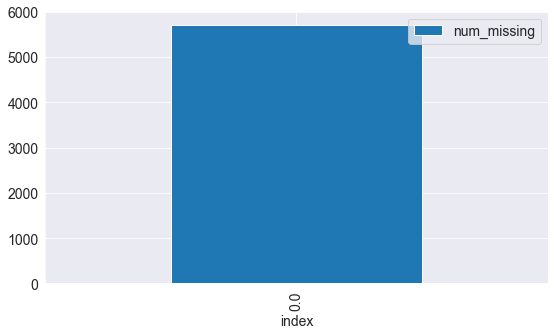

In [21]:
# first create missing indicator for features with missing data
for col in vaccinations_df.columns:
    missing = vaccinations_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in vaccinations_df.columns if 'ismissing' in col]
vaccinations_df['num_missing'] = vaccinations_df[ismissing_cols].sum(axis=1)

vaccinations_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [22]:
vaccinations_df.head()

,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred,year,month,day,num_missing
0,2020-12-27,AUT,739.0,739.0,0.0,0.0,0.0,0.01,0.0,0.0,2020,12,27,0.0
1,2020-12-28,AUT,2053.0,2053.0,0.0,1314.0,1314.0,0.02,146.0,0.0,2020,12,28,0.0
2,2020-12-29,AUT,3681.0,3681.0,0.0,1628.0,1471.0,0.04,163.0,0.0,2020,12,29,0.0
3,2020-12-30,AUT,5044.0,5044.0,0.0,1363.0,1435.0,0.06,159.0,0.0,2020,12,30,0.0
4,2020-12-31,AUT,5054.0,5054.0,0.0,10.0,1079.0,0.06,120.0,0.0,2020,12,31,0.0


In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [24]:
result = adfuller(vaccinations_df['daily_vaccinations'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.353613257075118
p-value: 4.2360504849607754e-06
Critical Values:
	1%: -3.431494949270172
	5%: -2.862045957685229
	10%: -2.567039319495901


In [25]:
vaccinations_df.head()


,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred,year,month,day,num_missing
0,2020-12-27,AUT,739.0,739.0,0.0,0.0,0.0,0.01,0.0,0.0,2020,12,27,0.0
1,2020-12-28,AUT,2053.0,2053.0,0.0,1314.0,1314.0,0.02,146.0,0.0,2020,12,28,0.0
2,2020-12-29,AUT,3681.0,3681.0,0.0,1628.0,1471.0,0.04,163.0,0.0,2020,12,29,0.0
3,2020-12-30,AUT,5044.0,5044.0,0.0,1363.0,1435.0,0.06,159.0,0.0,2020,12,30,0.0
4,2020-12-31,AUT,5054.0,5054.0,0.0,10.0,1079.0,0.06,120.0,0.0,2020,12,31,0.0


In [26]:
aut_df = vaccinations_df[vaccinations_df["iso_code"] == "AUT"]
aut_fullyV = aut_df["people_fully_vaccinated"]
aut_fullyV

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
187    3286985.0
188    3337033.0
189    3363244.0
190    3394460.0
191    3448649.0
Name: people_fully_vaccinated, Length: 192, dtype: float64

C:\Users\sscho\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0

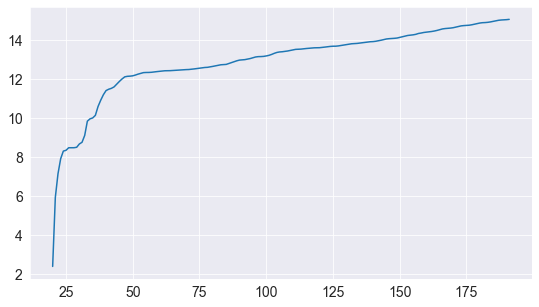

In [27]:
df_log_aut = np.log(aut_fullyV)
plt.plot(df_log_aut)
df_log_aut.isnull().sum()

In [28]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

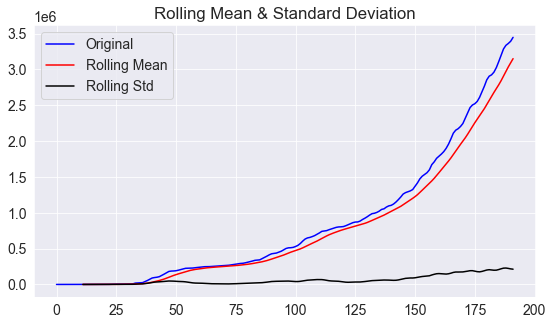

ADF Statistic: 1.9437812320043732
p-value: 0.9985952916782896
Critical Values:
	1%: -3.4680615871598537
	5%: -2.8781061899535128
	10%: -2.5756015922004134


In [29]:
get_stationarity(aut_fullyV)

In [30]:
# get_stationarity(df_log_aut)

In [31]:
rolling_mean = aut_fullyV.rolling(window=12).mean()

df_log_minus_mean = df_log_aut - rolling_mean
df_log_minus_mean.dropna(inplace=True)

# get_stationarity(df_log_minus_mean)


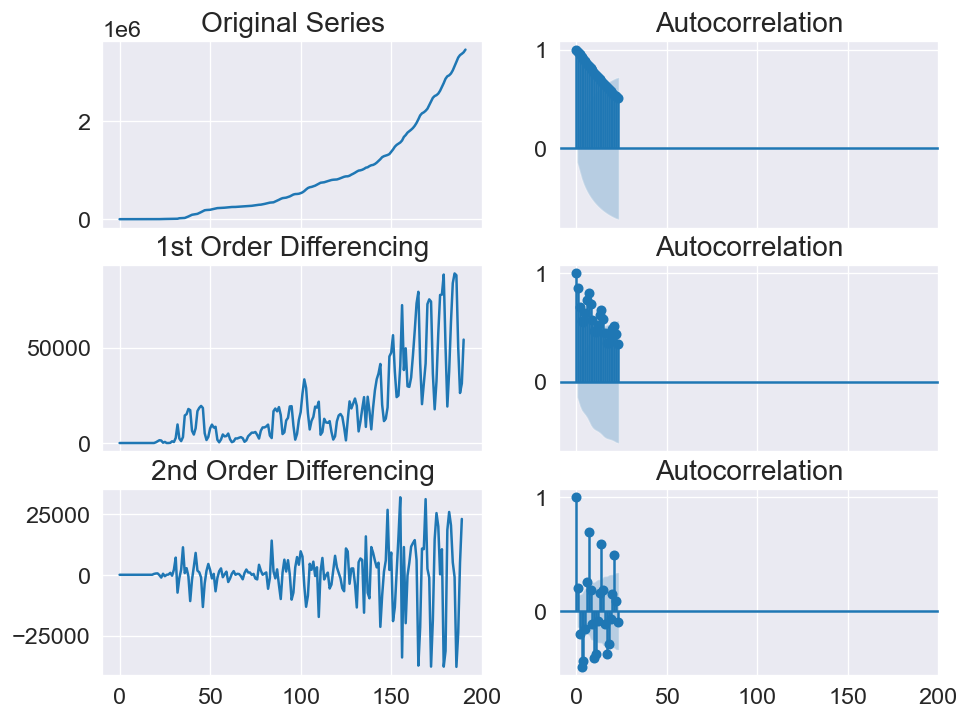

In [32]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(aut_fullyV); axes[0, 0].set_title('Original Series')
plot_acf(aut_fullyV, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(aut_fullyV)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(aut_fullyV), ax=axes[1, 1])
diffval = np.diff(aut_fullyV)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
diffval2 = np.diff(diffval)
plt.show()



In [33]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(aut_fullyV, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4045.293, Time=0.75 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4070.898, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4064.982, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4062.586, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4069.042, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3987.284, Time=0.43 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4054.570, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3958.381, Time=0.35 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4013.838, Time=0.17 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3930.775, Time=1.47 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3942.224, Time=0.38 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=3919.099, Time=0.65 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3931.207, Time=0.59 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=3907.382, Time=0.54 sec
 ARIMA(2,2,3)(0,0,0)[0]          

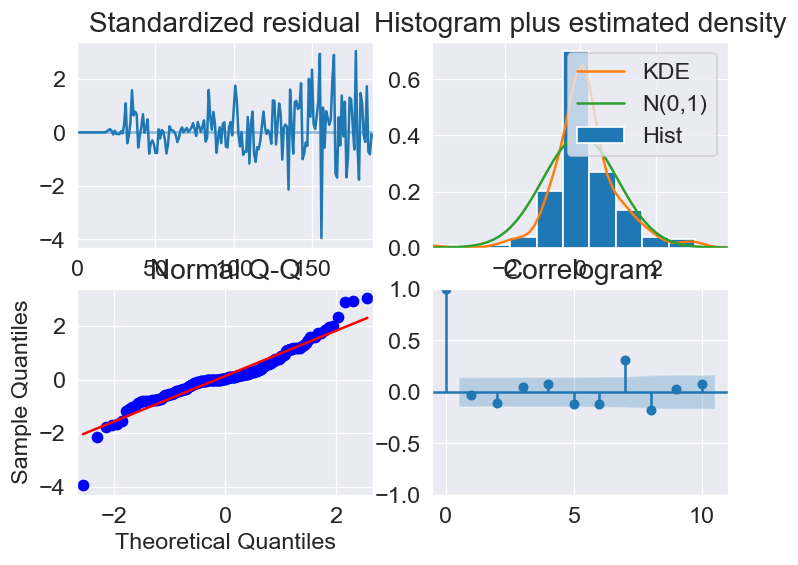

In [56]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

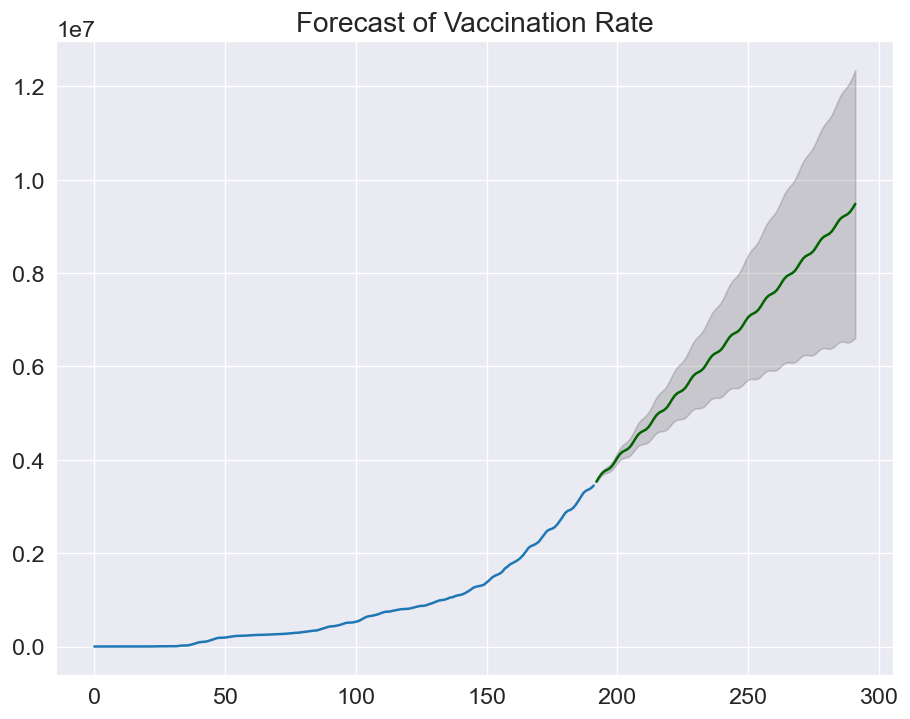

In [59]:
# Forecast
n_periods = 100
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(aut_fullyV), len(aut_fullyV)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(aut_fullyV)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

In [34]:
df = vaccinations_df

In [35]:
df = pd.read_csv('dataset_final.csv',
                  index_col='date',
                  parse_dates=True)


In [36]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings

from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('dataset_final.csv')

In [38]:
data.isna().sum()

date                                      0
iso_code                                  0
total_vaccinations                     1035
people_vaccinated                      1007
people_fully_vaccinated                1388
daily_vaccinations_raw                 1416
daily_vaccinations                       39
total_vaccinations_per_hundred         1035
daily_vaccinations_per_million           39
people_fully_vaccinated_per_hundred    1388
dtype: int64

In [39]:
data = data.drop(data[data.daily_vaccinations.isna()].index)

In [40]:
data.isna().sum()

date                                      0
iso_code                                  0
total_vaccinations                     1026
people_vaccinated                      1004
people_fully_vaccinated                1359
daily_vaccinations_raw                 1377
daily_vaccinations                        0
total_vaccinations_per_hundred         1026
daily_vaccinations_per_million            0
people_fully_vaccinated_per_hundred    1359
dtype: int64

In [41]:
data.head()

,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred
1,2020-12-28,AUT,2053.0,2053.0,NaN,1314.0,1314.0,0.02,146.0,NaN
2,2020-12-29,AUT,3681.0,3681.0,NaN,1628.0,1471.0,0.04,163.0,NaN
3,2020-12-30,AUT,5044.0,5044.0,NaN,1363.0,1435.0,0.06,159.0,NaN
4,2020-12-31,AUT,5054.0,5054.0,NaN,10.0,1079.0,0.06,120.0,NaN
5,2021-01-01,AUT,5061.0,5061.0,NaN,7.0,864.0,0.06,96.0,NaN


In [42]:
check_data = data.drop(data[data.people_fully_vaccinated.isna()].index)

In [43]:
check_data.head()

,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred
20,2021-01-16,AUT,109894.0,109883.0,11.0,6879.0,11599.0,1.22,1288.0,0.00
21,2021-01-17,AUT,115600.0,115223.0,377.0,5706.0,12093.0,1.28,1343.0,0.00
22,2021-01-18,AUT,127085.0,125817.0,1268.0,11485.0,12924.0,1.41,1435.0,0.01
23,2021-01-19,AUT,153260.0,150525.0,2735.0,26175.0,14530.0,1.70,1613.0,0.03
24,2021-01-20,AUT,177009.0,172960.0,4049.0,23749.0,15631.0,1.97,1736.0,0.04


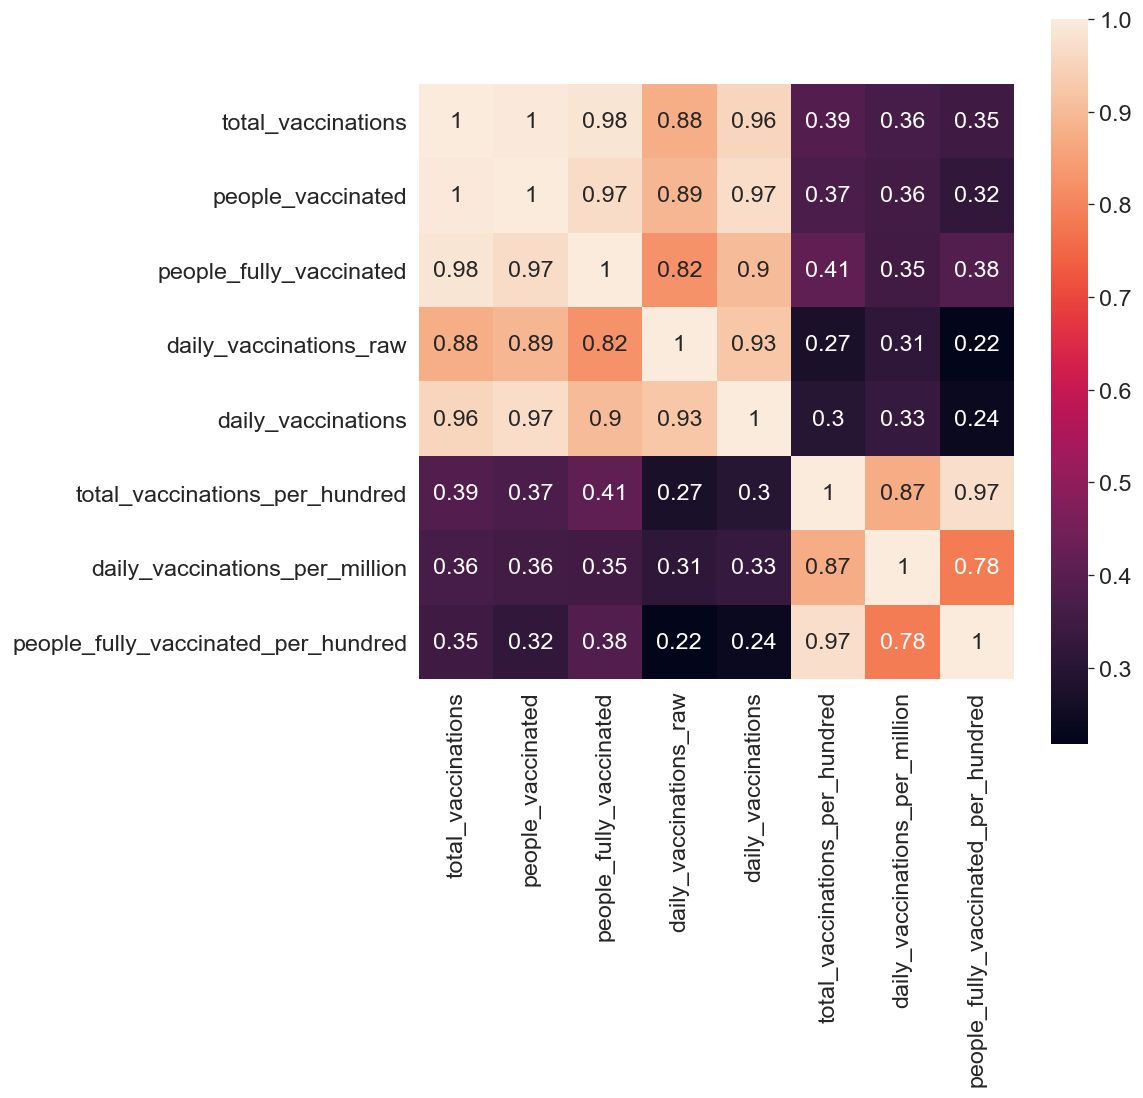

In [44]:
plt.subplots(figsize=(8, 8))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

In [45]:
scipy.stats.mannwhitneyu(check_data.daily_vaccinations, check_data.people_fully_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=3626080.0, pvalue=0.0)

In [46]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations_per_hundred, check_data.daily_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=248957.5, pvalue=0.0)

In [47]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated, check_data.daily_vaccinations)

MannwhitneyuResult(statistic=3626080.0, pvalue=0.0)

In [48]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated_per_hundred, check_data.daily_vaccinations_per_million)

MannwhitneyuResult(statistic=14494.0, pvalue=0.0)

In [49]:
data.isna().sum()

date                                      0
iso_code                                  0
total_vaccinations                     1026
people_vaccinated                      1004
people_fully_vaccinated                1359
daily_vaccinations_raw                 1377
daily_vaccinations                        0
total_vaccinations_per_hundred         1026
daily_vaccinations_per_million            0
people_fully_vaccinated_per_hundred    1359
dtype: int64

In [50]:
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)

In [51]:
data.isna().sum()

date                                      0
iso_code                                  0
total_vaccinations                     1026
people_vaccinated                      1004
people_fully_vaccinated                   0
daily_vaccinations_raw                 1377
daily_vaccinations                        0
total_vaccinations_per_hundred         1026
daily_vaccinations_per_million            0
people_fully_vaccinated_per_hundred       0
dtype: int64

In [52]:
data.total_vaccinations_per_hundred = data.total_vaccinations_per_hundred.fillna(0)

In [53]:
data.isna().sum()

date                                      0
iso_code                                  0
total_vaccinations                     1026
people_vaccinated                      1004
people_fully_vaccinated                   0
daily_vaccinations_raw                 1377
daily_vaccinations                        0
total_vaccinations_per_hundred            0
daily_vaccinations_per_million            0
people_fully_vaccinated_per_hundred       0
dtype: int64

In [54]:
data.total_vaccinations = data.total_vaccinations.fillna(0)
data.people_vaccinated = data.people_vaccinated.fillna(0)
data.daily_vaccinations_raw = data.daily_vaccinations_raw.fillna(0)
data.isna().sum()

date                                   0
iso_code                               0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
daily_vaccinations_per_million         0
people_fully_vaccinated_per_hundred    0
dtype: int64